In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import penne

/home/max/conda/envs/penne/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataset = 'mdb'
stem = '000159'

# Load from cache
directory = penne.CACHE_DIR / dataset
audio = np.load(directory / f'{stem}-audio.npy')
pitch = np.load(directory / f'{stem}-pitch.npy')
voiced = np.load(directory / f'{stem}-voiced.npy')

# Convert to torch
audio = torch.from_numpy(audio)[None]
pitch = torch.from_numpy(pitch)
voiced = torch.from_numpy(voiced)

# Convert to pitch bin categories
bins = penne.convert.frequency_to_bins(pitch)

# Set unvoiced bins to random values
bins = torch.where(
    ~voiced,
    torch.randint(0, penne.PITCH_BINS, bins.shape, dtype=torch.long),
    bins)

# Infer
predicted_pitch, predicted_periodicity, logits, frames = penne.from_audio(
    audio[:, :],
    penne.SAMPLE_RATE,
    model='crepe',
    checkpoint=penne.RUNS_DIR / 'crepe' / '00250000.pt',
    batch_size=2048,
    gpu=0)

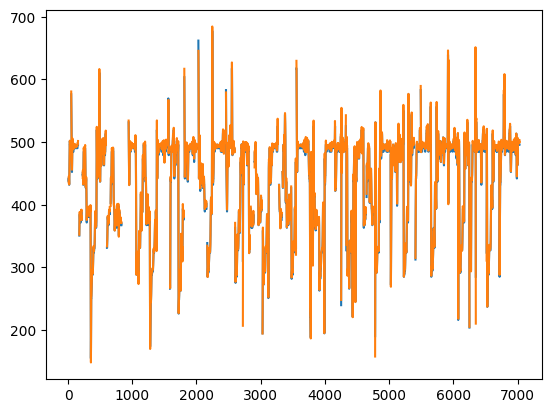

In [10]:
pitch[~voiced] = np.nan
predicted_pitch[:, ~voiced] = np.nan
plt.plot(predicted_pitch.squeeze())
plt.plot(pitch.squeeze())


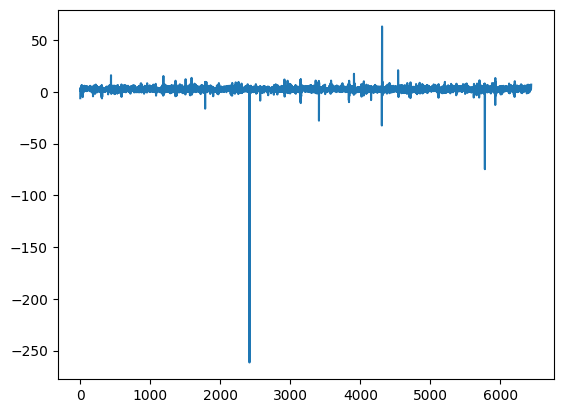

In [11]:
plt.plot(pitch[voiced].squeeze() - predicted_pitch.squeeze()[voiced])